In [98]:
import re
import os
import numpy as np
import pandas as pd

import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [99]:
train = pd.read_csv(r"code\news\FB_20201106.csv")
print(train.shape)

(1268, 3)


In [100]:
all_content_train = []
for idx, em in enumerate(train["content"].values):
    all_content_train.append(TaggedDocument(em, [idx]))

In [101]:
d2v_model = Doc2Vec(
    all_content_train, 
    size=128,
    window=5,
    min_count=4,
    workers=4,
    dm=1,
)

d2v_model.train(
    all_content_train,
    total_examples=d2v_model.corpus_count,
    epochs=32,
    start_alpha=0.025
)

d2v_model.save("d2v.model")

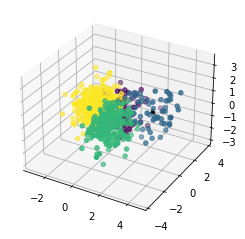

In [102]:
# features = d2v_model.transform(self.X)
kmeans_model = KMeans(n_clusters=4, max_iter=300)
kmeans_model.fit(d2v_model.docvecs.doctag_syn0)

# labels = kmeans_model.labels_.tolist()
# l = kmeans_model.fit_predict(d2v_model.docvecs.doctag_syn0)
pca = PCA(n_components=3)
datapoint = pca.fit_transform(d2v_model.docvecs.doctag_syn0)

# print(datapoint.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
centroidpoint = pca.transform(kmeans_model.cluster_centers_)
ax.scatter(datapoint[:, 0], datapoint[:, 1], datapoint[:, 2], c=kmeans_model.labels_.tolist(), cmap='viridis')
ax.scatter(centroidpoint[:, 0], centroidpoint[:, 1], centroidpoint[:, 2], marker="^", c="black")
plt.show()
